# load local data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
import keras
from keras.models import Sequential
# from keras.layers.core import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout
from keras.optimizers import Adam
from keras.layers import Conv1D, Conv2D, MaxPooling2D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score, accuracy_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import csv
import collections
from scipy.stats import zscore
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
column_names=["Date", "Time", "Open", "High", "Low", "Close", "Volume"]

files = [file for file in os.listdir('./data/XAUUSD/')]
files

['DAT_MT_XAUUSD_M1_2015.csv',
 'DAT_MT_XAUUSD_M1_2019.csv',
 'DAT_MT_XAUUSD_M1_2014.csv',
 'DAT_MT_XAUUSD_M1_2018.csv',
 'DAT_MT_XAUUSD_M1_2016.csv',
 'DAT_MT_XAUUSD_M1_2012.csv',
 'DAT_MT_XAUUSD_M1_2009.csv',
 'DAT_MT_XAUUSD_M1_2021.csv',
 'DAT_MT_XAUUSD_M1_2010.csv',
 'DAT_MT_XAUUSD_M1_2020.csv',
 'DAT_MT_XAUUSD_M1_2022.csv',
 'DAT_MT_XAUUSD_M1_2011.csv',
 'DAT_MT_XAUUSD_M1_2017.csv',
 'DAT_MT_XAUUSD_M1_2013.csv']

# Loop throught all the data files and merge them into one CSV file

In [3]:
data = pd.DataFrame()

for file in files:
#     print(file)
    df = pd.read_csv("./data/XAUUSD/"+file, names=column_names)
    data = pd.concat([data, df])

data.to_csv("all_data.csv", index=False)

In [4]:
data = pd.read_csv("./all_data.csv")
data

,Date,Time,Open,High,Low,Close,Volume
0,2015.01.01,18:01,1184.13,1184.44,1184.04,1184.13,0
1,2015.01.01,18:02,1184.12,1184.41,1184.12,1184.41,0
2,2015.01.01,18:03,1184.53,1184.54,1184.32,1184.54,0
3,2015.01.01,18:04,1184.60,1184.60,1184.43,1184.51,0
4,2015.01.01,18:05,1184.46,1184.54,1184.46,1184.54,0
...,...,...,...,...,...,...,...
4862461,2013.12.31,15:55,1202.29,1202.59,1202.28,1202.59,0
4862462,2013.12.31,15:56,1202.58,1202.74,1202.58,1202.68,0
4862463,2013.12.31,15:57,1202.67,1202.90,1202.67,1202.89,0
4862464,2013.12.31,15:58,1202.96,1203.11,1202.95,1203.05,0


# Filter dataframe to produce only daily data from existing data

In [5]:
data['Date'] = pd.to_datetime(data['Date'], format='%Y.%m.%d')
df = data.drop_duplicates(subset='Date')

In [6]:
df.head(3)

,Date,Time,Open,High,Low,Close,Volume
0,2015-01-01,18:01,1184.13,1184.44,1184.04,1184.13,0
347,2015-01-02,00:00,1184.69,1184.79,1184.48,1184.62,0
1360,2015-01-04,18:00,1187.01,1187.01,1186.65,1187.00,0


In [7]:
df = df.reset_index(drop=True) # use the date column as the index
df

,Date,Time,Open,High,Low,Close,Volume
0,2015-01-01,18:01,1184.13,1184.44,1184.04,1184.13,0
1,2015-01-02,00:00,1184.69,1184.79,1184.48,1184.62,0
2,2015-01-04,18:00,1187.01,1187.01,1186.65,1187.00,0
3,2015-01-05,00:00,1191.69,1192.09,1191.61,1191.70,0
4,2015-01-06,00:00,1206.55,1207.23,1206.55,1206.58,0
...,...,...,...,...,...,...,...
4289,2013-12-26,06:09,1205.70,1205.70,1205.70,1205.70,0
4290,2013-12-27,00:00,1211.03,1211.15,1210.93,1211.06,0
4291,2013-12-29,18:00,1214.20,1214.60,1214.20,1214.45,0
4292,2013-12-30,00:00,1209.71,1209.72,1209.61,1209.63,0


In [8]:
df = df.iloc[::-1] # This reverses the order of the dataframe rows

In [9]:
df.head(3)

,Date,Time,Open,High,Low,Close,Volume
4293,2013-12-31,00:00,1198.14,1198.59,1198.14,1198.48,0
4292,2013-12-30,00:00,1209.71,1209.72,1209.61,1209.63,0
4291,2013-12-29,18:00,1214.20,1214.60,1214.20,1214.45,0


In [10]:
df.shape

(4294, 7)

In [11]:
df = df.reset_index(drop=True) # reset index
df

,Date,Time,Open,High,Low,Close,Volume
0,2013-12-31,00:00,1198.14,1198.59,1198.14,1198.48,0
1,2013-12-30,00:00,1209.71,1209.72,1209.61,1209.63,0
2,2013-12-29,18:00,1214.20,1214.60,1214.20,1214.45,0
3,2013-12-27,00:00,1211.03,1211.15,1210.93,1211.06,0
4,2013-12-26,06:09,1205.70,1205.70,1205.70,1205.70,0
...,...,...,...,...,...,...,...
4289,2015-01-06,00:00,1206.55,1207.23,1206.55,1206.58,0
4290,2015-01-05,00:00,1191.69,1192.09,1191.61,1191.70,0
4291,2015-01-04,18:00,1187.01,1187.01,1186.65,1187.00,0
4292,2015-01-02,00:00,1184.69,1184.79,1184.48,1184.62,0


In [12]:
df = df.drop(columns=['Date', 'Time', 'Volume']) # drop unnecessary columns

In [13]:
df.head()

,Open,High,Low,Close
0,1198.14,1198.59,1198.14,1198.48
1,1209.71,1209.72,1209.61,1209.63
2,1214.20,1214.60,1214.20,1214.45
3,1211.03,1211.15,1210.93,1211.06
4,1205.70,1205.70,1205.70,1205.70


Lets take a look at closing price, its so rough

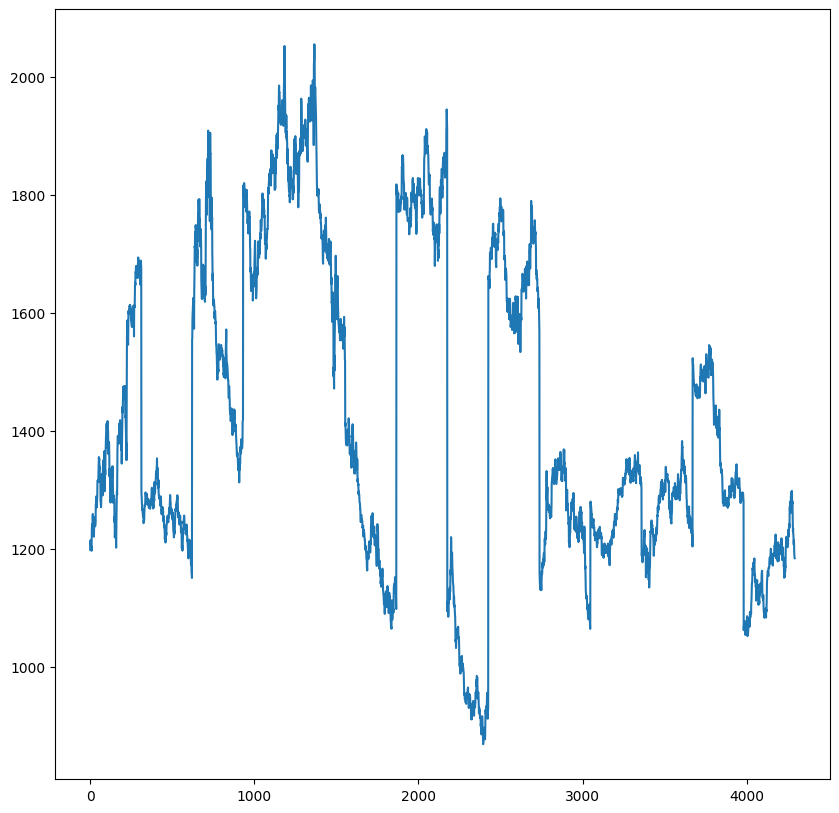

In [14]:
plt.figure(figsize=(10,10))
plt.plot(df['Close'])

In [15]:
# Normalization

scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(df)

y_close = df[:,1]

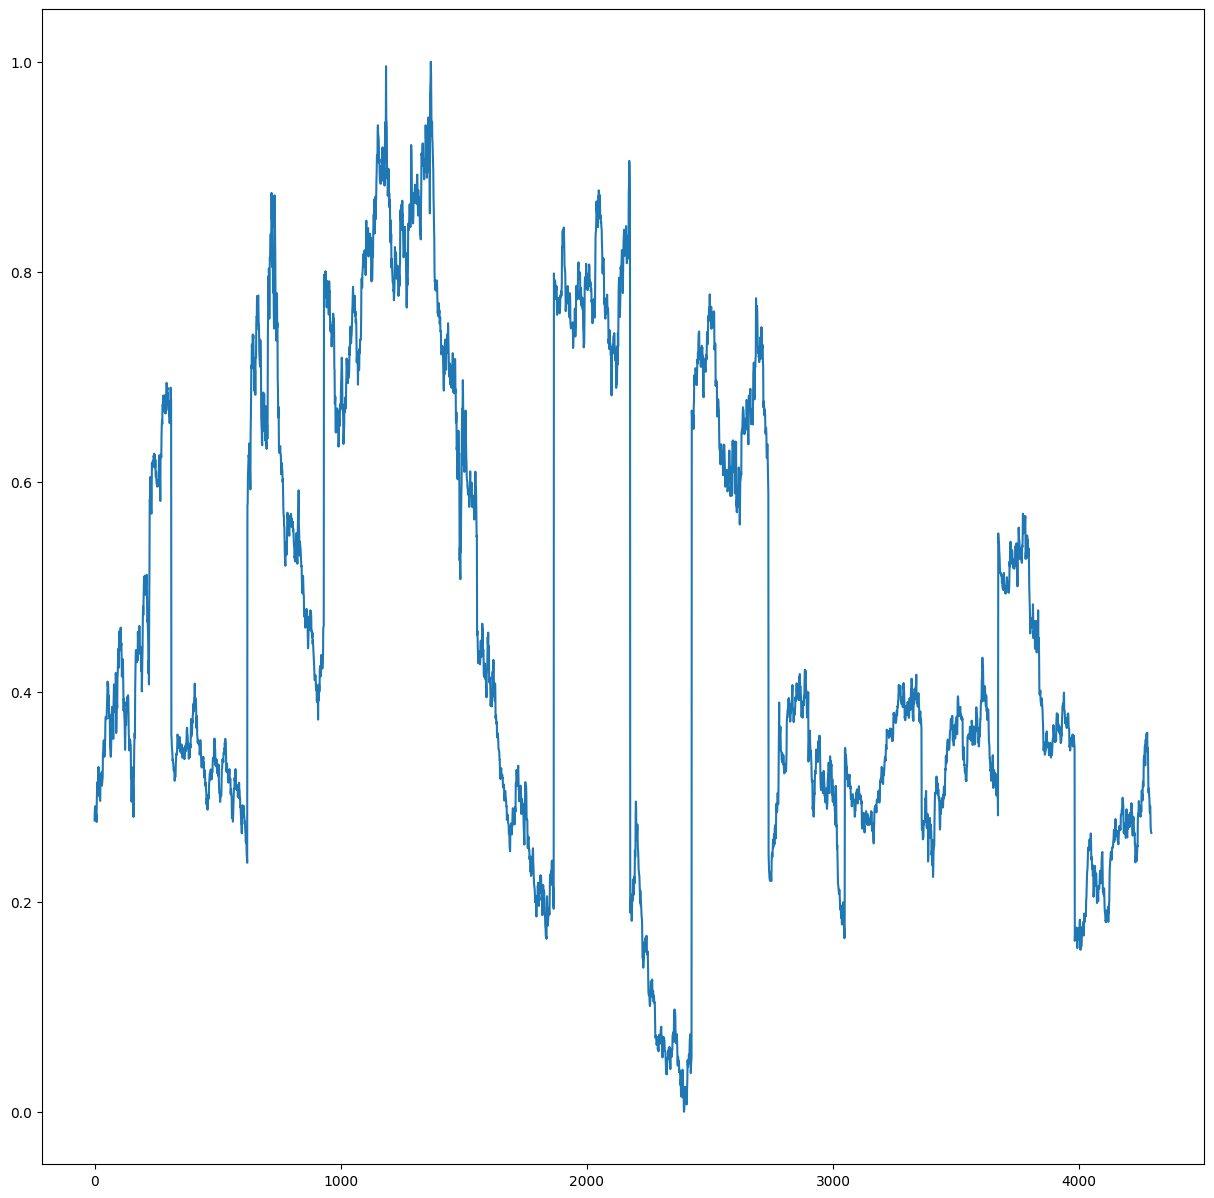

In [16]:

plt.figure(figsize=(15,15))
plt.plot(y_close)
plt.show()

# Data splitting into training and testing data

In [17]:
ntrain = int(len(y_close)*0.8)

train = df[0:ntrain]
test  = df[ntrain:len(df)]

y_close_train = y_close[0:ntrain]
y_close_test  = y_close[ntrain:len(y_close)]

In [18]:
y_close_test.shape

(859,)

## Here we construct the image

In [19]:
import numpy as np

def to_sequences(seq_size, data,close):
    x = []
    y = []

    for i in range(len(data)-seq_size-1):
        window = data[i:(i+seq_size)]
        after_window = close[i+seq_size]
        window = [[x] for x in window]
        x.append(window)
        y.append(after_window)

    return np.array(x),np.array(y)


timesteps = 10

x_train, y_train = to_sequences(timesteps, train, y_close_train)
x_test, y_test   = to_sequences(timesteps, test, y_close_test)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (3424, 10, 1, 4)
Shape of x_test: (848, 10, 1, 4)
Shape of y_train: (3424,)
Shape of y_test: (848,)


In [20]:
x_train[0]

array([[[0.27742851, 0.27748271, 0.27798532, 0.27791878]],

       [[0.28716594, 0.28685109, 0.28765797, 0.28732046]],

       [[0.29094478, 0.29095871, 0.29152872, 0.29138469]],

       [[0.28827687, 0.28805476, 0.28877113, 0.28852624]],

       [[0.28379109, 0.28346736, 0.28436067, 0.28400668]],

       [[0.27768941, 0.27752479, 0.27824675, 0.27799467]],

       [[0.27969244, 0.27947759, 0.28016947, 0.28000992]],

       [[0.28153557, 0.28281082, 0.28210063, 0.28307916]],

       [[0.27582103, 0.27598444, 0.27637462, 0.27633356]],

       [[0.29596077, 0.29568078, 0.29641142, 0.29609818]]])

In [21]:
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[2], x_train.shape[1],x_train.shape[3]))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[2],x_test.shape[1],x_test.shape[3]))

In [22]:
print(x_train.shape)

(3424, 1, 10, 4)


In [23]:
x_train[0][0].shape

(10, 4)

### Here is the image expected

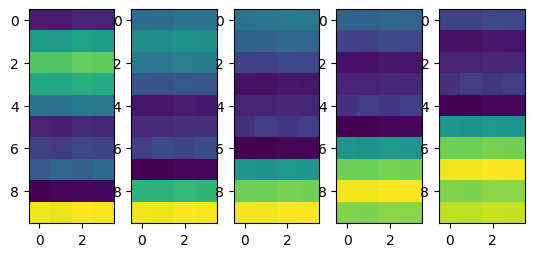

In [24]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)
ax1.imshow(x_train[0][0])
ax2.imshow(x_train[1][0])
ax3.imshow(x_train[2][0])
ax4.imshow(x_train[3][0])
ax5.imshow(x_train[4][0])

In [25]:
cnn = Sequential()
cnn.add(Conv2D(8, kernel_size = (1, 2), strides = (1, 1),  padding = 'valid',
               activation = 'relu', input_shape = (1,10,4)))
cnn.add(MaxPooling2D(pool_size = (1,2)))

cnn.add(Flatten())
cnn.add(Dense(64, activation="relu"))
cnn.add(Dropout(0.5))
cnn.add(Dense(1, activation="relu"))
cnn.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 1, 9, 8)             │              72 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 1, 4, 8)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,249 (8.79 KB)

 Trainable params: 2,249 (8.79 KB)

 Non-trainable params: 0 (0.00 B)

In [26]:
cnn.compile(loss='mean_squared_error', optimizer='nadam')

monitor = EarlyStopping(monitor='val_loss', min_delta=1, patience=2, verbose=2, mode='auto')
checkpointer = ModelCheckpoint(filepath="CNN_Parameters.hdf5.keras", verbose=0, save_best_only=True) # save best model # also file path should end in ".keras" depending on the version and environment running the keras

In [27]:
history = cnn.fit(x_train,y_train,validation_split=0.2,batch_size = 128, callbacks=[checkpointer],verbose=1,epochs = 100)

Epoch 1/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.1196 - val_loss: 7.1297e-04
Epoch 2/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0563 - val_loss: 4.0955e-04
Epoch 3/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0341 - val_loss: 3.5823e-04
Epoch 4/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0267 - val_loss: 4.3037e-04
Epoch 5/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - val_loss: 4.0025e-04
Epoch 6/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0179 - val_loss: 3.2169e-04
Epoch 7/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0161 - val_loss: 3.1840e-04
Epoch 8/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 3.3871e-04
Epoch 9/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0148 - val_loss: 3.3790e-04
Epoch 10/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142 - val_loss: 2.9830e-04
Epoch 11/100
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 - val_loss: 3.3302e-04
Epoch 12/100
22/2

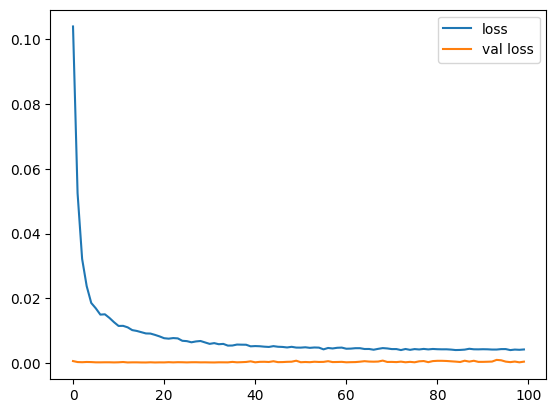

In [28]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()

In [29]:
cnn.load_weights('CNN_Parameters.hdf5.keras')

pred = cnn.predict(x_test)
print(pred.shape)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
(848, 1)


In [30]:
score = np.sqrt(metrics.mean_squared_error(y_test, pred))
print("RMSE Score: {}".format(score))

RMSE Score: 0.02033748376075988


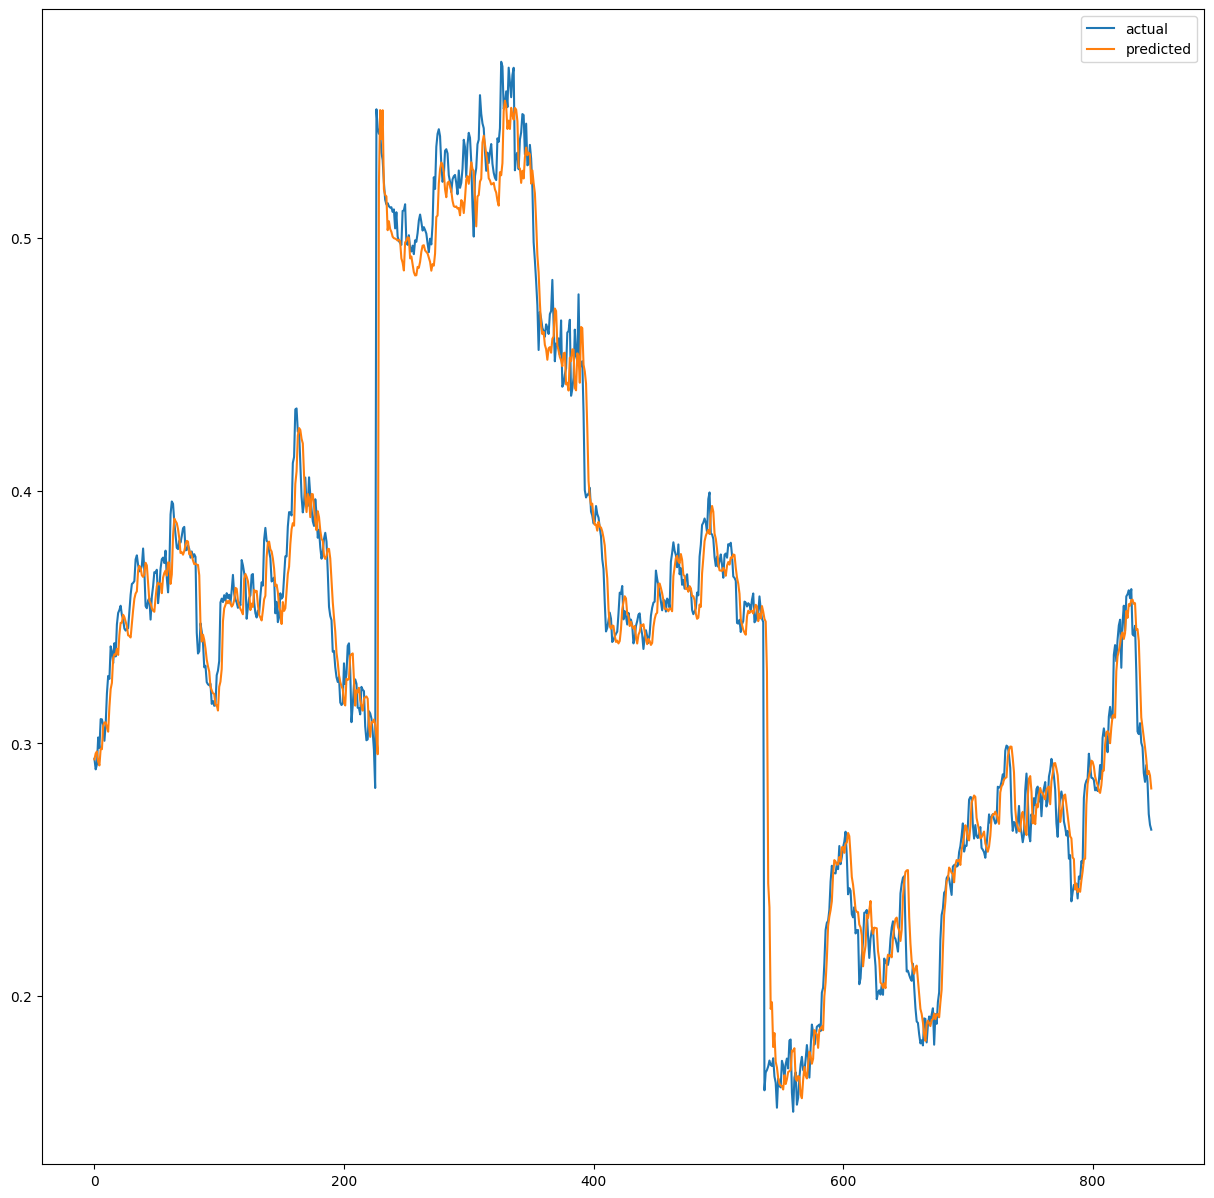

In [35]:
plt.figure(figsize=(15,15))

plt.plot(y_test, label = 'actual')
plt.plot(pred,   label = 'predicted')
plt.legend()
plt.show()